In [1]:
from DynaAgent import DynaAgent
import matplotlib.pyplot as plt
import gymnasium as gym
import numpy as np
import seaborn as sns
env = gym.make('MountainCar-v0')
# env = gym.make('MountainCar-v0', render_mode="human")

In [2]:
testDyna = DynaAgent(env, should_log=True)

-----------variables- new--------
number of positions = 72
number of velocity = 28
number of states = 2016
self.discretization_position = [-1.2   -1.175 -1.15  -1.125 -1.1   -1.075 -1.05  -1.025 -1.    -0.975
 -0.95  -0.925 -0.9   -0.875 -0.85  -0.825 -0.8   -0.775 -0.75  -0.725
 -0.7   -0.675 -0.65  -0.625 -0.6   -0.575 -0.55  -0.525 -0.5   -0.475
 -0.45  -0.425 -0.4   -0.375 -0.35  -0.325 -0.3   -0.275 -0.25  -0.225
 -0.2   -0.175 -0.15  -0.125 -0.1   -0.075 -0.05  -0.025  0.     0.025
  0.05   0.075  0.1    0.125  0.15   0.175  0.2    0.225  0.25   0.275
  0.3    0.325  0.35   0.375  0.4    0.425  0.45   0.475  0.5    0.525
  0.55   0.575  0.6  ]
self.discretization_speed = [-0.07  -0.065 -0.06  -0.055 -0.05  -0.045 -0.04  -0.035 -0.03  -0.025
 -0.02  -0.015 -0.01  -0.005  0.     0.005  0.01   0.015  0.02   0.025
  0.03   0.035  0.04   0.045  0.05   0.055  0.06   0.065  0.07 ]
-----------------------------------------
------------------------------------------
We will log this exper

In [3]:
total_reward = testDyna.run(num_episodes=3000)

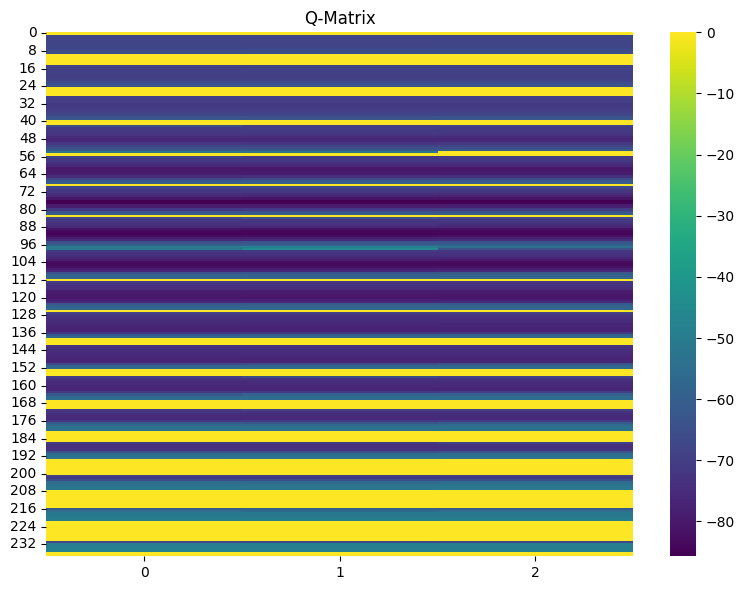

In [5]:
plt.figure(figsize=(8, 6))

# Plot the Q-value heatmap
sns.heatmap(testDyna.Q, cmap='viridis', cbar=True)

# Set title
plt.title('Q-Matrix')

# Display the plot
plt.tight_layout()
plt.show()


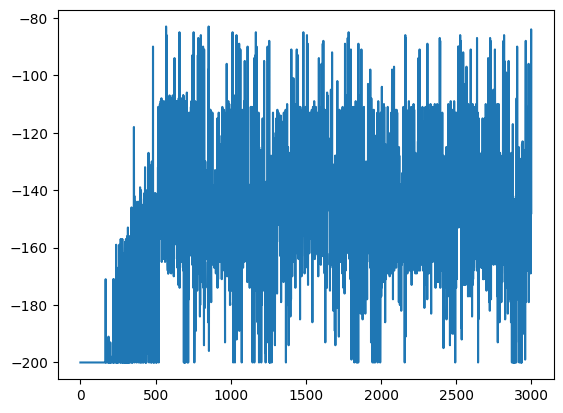

In [6]:
plt.plot(total_reward)

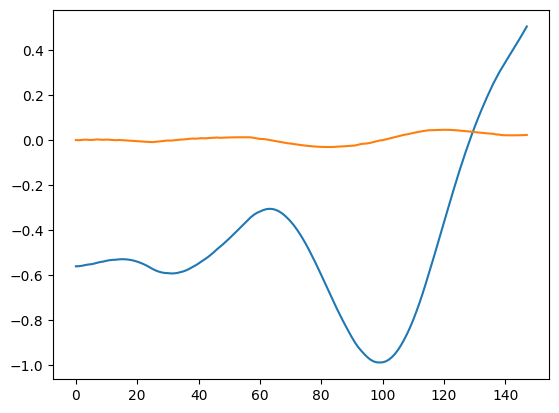

In [7]:
plt.plot(testDyna.observations)

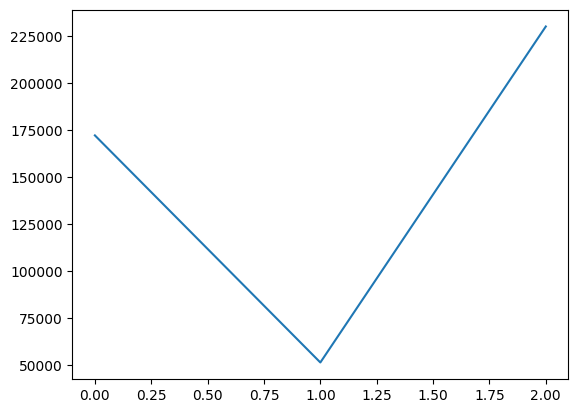

In [8]:
plt.plot(testDyna.freq_actions)

In [6]:
testDyna.freq_actions

[8059, 7410, 6999]

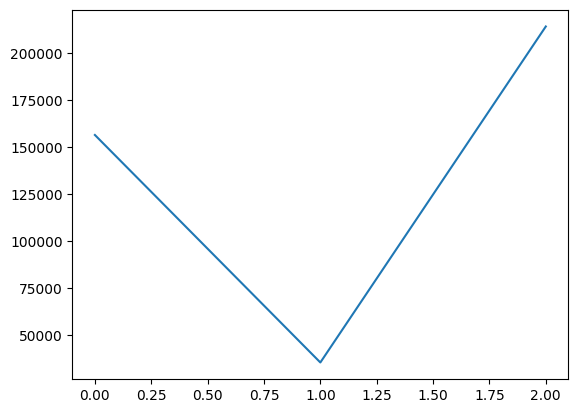

In [9]:
plt.plot(testDyna.freq_result)

In [7]:
testDyna.freq_result

[3221, 2515, 2135]